# San Francisco Housing Rental Analysis

In this assignment, you will perform basic analysis for the San Francisco Housing Market to allow potential real estate investors to choose rental investment properties. 

In [133]:
# initial imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import plotly.express as px
from pathlib import Path
from dotenv import load_dotenv
from panel.interact import interact
from panel import widgets
import hvplot.pandas

import panel as pn

%matplotlib inline

In [134]:
# Read the Mapbox API key
load_dotenv()
mapbox_token = os.getenv("MAPBOX_TOKEN")


## Load Data

In [135]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function. 

Hint: Use the Pandas groupby function

Optional challenge: Use the min, max, and std to scale the y limits of the chart.

In [136]:
# Calculate the mean number of housing units per year (hint: use groupby) 
# YOUR CODE HERE!
units_per_year= sfo_data.groupby('year').mean()["housing_units"]
units_per_year

year
2010    372560
2011    374507
2012    376454
2013    378401
2014    380348
2015    382295
2016    384242
Name: housing_units, dtype: int64

In [137]:
std_y=units_per_year.std()
min_y=units_per_year.min()-std_y
max_y=units_per_year.max()+std_y

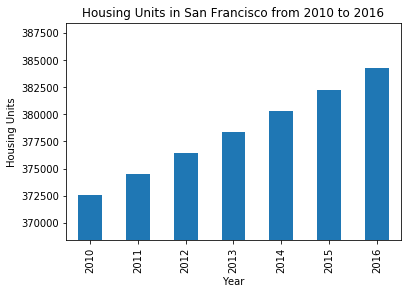

In [138]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.
# YOUR CODE HERE!

# Optional Challenge: Use the min, max, and std to scale the y limits of the chart
# YOUR CODE HERE!
ax = units_per_year.plot(kind="bar", title='Housing Units in San Francisco from 2010 to 2016')
ax.set_xlabel("Year")
ax.set_ylabel("Housing Units")
plt.ylim(min_y,max_y)
plt.show()


- - - 

## Average Prices per Square Foot

In this section, you will calculate the average gross rent and average sales price for each year. Plot the results as a line chart.

### Average Gross Rent in San Francisco Per Year

In [139]:
# Calculate the average gross rent and average sale price per square foot
# YOUR CODE HERE!
average_per_year= sfo_data.groupby('year').mean()
average_per_year

,sale_price_sqr_foot,housing_units,gross_rent
year,,,
2010,369.344353,372560,1239
2011,341.903429,374507,1530
2012,399.389968,376454,2324
2013,483.600304,378401,2971
2014,556.277273,380348,3528
2015,632.540352,382295,3739
2016,697.643709,384242,4390


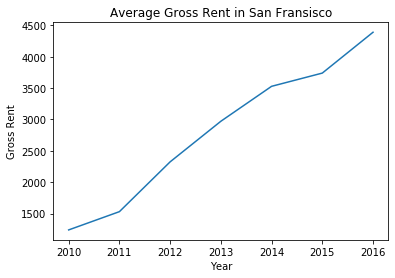

In [140]:
# Plot the Average Gross Rent per Year as a Line Chart 
# YOUR CODE HERE!
#average_per_year['gross_rent'].plot(title="Average Gross Rent in San Fransisco")

ax = average_per_year['gross_rent'].plot(kind="line",title="Average Gross Rent in San Fransisco")
ax.set_xlabel("Year")
ax.set_ylabel("Gross Rent")
plt.show()

### Average Sales Price per Year

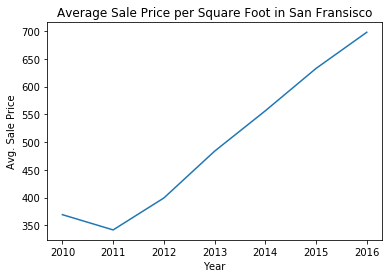

In [141]:
# Plot the Average Sales Price per Year as a line chart
# YOUR CODE HERE!
#average_per_year['sale_price_sqr_foot'].plot(y='Avg. Sale Price',title="Average Sale Price per Square Foot in San Fransisco")
ax = average_per_year['sale_price_sqr_foot'].plot(kind="line",title="Average Sale Price per Square Foot in San Fransisco")
ax.set_xlabel("Year")
ax.set_ylabel("Avg. Sale Price")
plt.show()

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create an interactive visulization of the Average Prices with a dropdown selector for the neighborhood.

Hint: It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [142]:
# Group by year and neighborhood and then create a new dataframe of the mean values
# YOUR CODE HERE!
neighborhood_data_per_year= sfo_data.groupby(['year','neighborhood']).mean()
neighborhood_data_per_year.reset_index(inplace=True)
neighborhood_data_per_year

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239
...,...,...,...,...,...
392,2016,Telegraph Hill,903.049771,384242,4390
393,2016,Twin Peaks,970.085470,384242,4390
394,2016,Van Ness/ Civic Center,552.602567,384242,4390
395,2016,Visitacion Valley,328.319007,384242,4390


In [143]:
df_sliced=neighborhood_data_per_year[['year','neighborhood','sale_price_sqr_foot']]
df_sliced


,year,neighborhood,sale_price_sqr_foot
0,2010,Alamo Square,291.182945
1,2010,Anza Vista,267.932583
2,2010,Bayview,170.098665
3,2010,Buena Vista Park,347.394919
4,2010,Central Richmond,319.027623
...,...,...,...
392,2016,Telegraph Hill,903.049771
393,2016,Twin Peaks,970.085470
394,2016,Van Ness/ Civic Center,552.602567
395,2016,Visitacion Valley,328.319007


Column
    [0] Column
        [0] Select(name='neighborhood', options=['Alamo Square', ...], value='Alamo Square')
    [1] Row
        [0] Str(AxesSubplot, name='interactive01625')

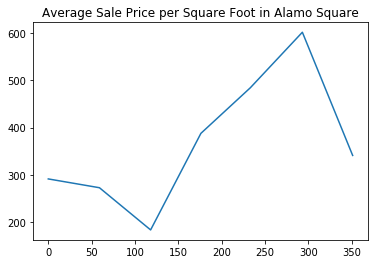

In [144]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood
# YOUR CODE HERE!
from panel.interact import interact
from panel import widgets
import hvplot.pandas
def plot_neighborhood_data(neighborhood):
        neighborhood_df=df_sliced.loc[df_sliced["neighborhood"] == neighborhood]
        return neighborhood_df['sale_price_sqr_foot'].plot(kind="line",title="Average Sale Price per Square Foot in " + neighborhood)

interact(plot_neighborhood_data, neighborhood=df_sliced['neighborhood'])


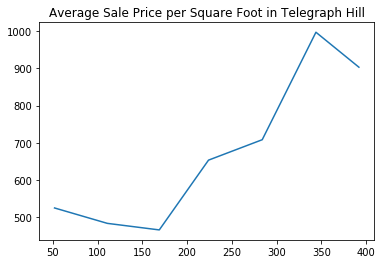

In [145]:
plot_neighborhood_data('Telegraph Hill')

Column
    [0] Column
        [0] Select(name='neighborhood', options=['Anza Vista', ...], value='Anza Vista')
    [1] Row
        [0] Str(AxesSubplot, name='interactive01637')

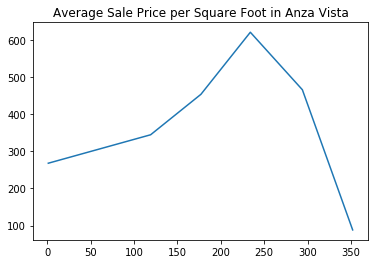

In [146]:
interact(plot_neighborhood_data, neighborhood=['Anza Vista','Parkside'])


### _For some reason, my graph was not refreshing after chaging the value in combo. I tried the following, still not refreshing._
#### _Is there a way to enforce the refresh using some command ? Not sure if I am missing something or my Pyviz/jupyter lab has an issue._

In [15]:
def plot_neighborhood_data(neighborhood):
        return (" You selected: " + neighborhood)

interact(plot_neighborhood_data, neighborhood=neighborhood_data_per_year['neighborhood'])


Column
    [0] Column
        [0] Select(name='neighborhood', options=['Alamo Square', ...], value='Alamo Square')
    [1] Row
        [0] Markdown(str, name='interactive01470')

- - - 

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [147]:
# Getting the data from the top 10 expensive neighborhoods
# YOUR CODE HERE!
averages_by_neighborhood=sfo_data.groupby('neighborhood').mean().sort_values(by=['sale_price_sqr_foot'], ascending=False).head(10)
averages_by_neighborhood

,sale_price_sqr_foot,housing_units,gross_rent
neighborhood,,,
Union Square District,903.993258,377427.50,2555.166667
Merced Heights,788.844818,380348.00,3414.000000
Miraloma Park,779.810842,375967.25,2155.250000
Pacific Heights,689.555817,378401.00,2817.285714
Westwood Park,687.087575,382295.00,3959.000000
Telegraph Hill,676.506578,378401.00,2817.285714
Presidio Heights,675.350212,378401.00,2817.285714
Cow Hollow,665.964042,378401.00,2817.285714
Potrero Hill,662.013613,378401.00,2817.285714


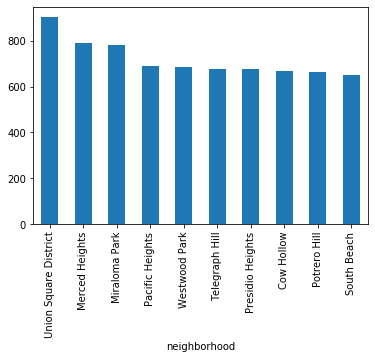

In [148]:
# Plotting the data from the top 10 expensive neighborhoods
# YOUR CODE HERE!
averages_by_neighborhood["sale_price_sqr_foot"].plot(kind="bar")

### _Leveraging the same code I used above to modify the graph and set min, max values..._

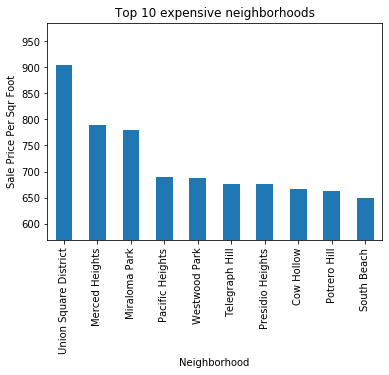

In [149]:
std_y=averages_by_neighborhood["sale_price_sqr_foot"].std()
min_y=averages_by_neighborhood["sale_price_sqr_foot"].min()-std_y
max_y=averages_by_neighborhood["sale_price_sqr_foot"].max()+std_y

ax = averages_by_neighborhood["sale_price_sqr_foot"].plot(kind="bar", title='Top 10 expensive neighborhoods')
ax.set_xlabel("Neighborhood")
ax.set_ylabel("Sale Price Per Sqr Foot")
plt.ylim(min_y,max_y)
plt.show()


- - - 

## Parallel Coordinates and Parallel Categories Analysis

In this section, you will use plotly express to create parallel coordinates and parallel categories visualizations so that investors can interactively filter and explore various factors related to the sales price of the neighborhoods. 

Using the DataFrame of Average values per neighborhood (calculated above), create the following visualizations:
1. Create a Parallel Coordinates Plot
2. Create a Parallel Categories Plot

### _I figured out my jupyter lab worked only when I used panel.column.. otherwise it wasn't showing the graph. So using the workaround to show the graphs_

In [150]:
# Parallel Coordinates Plot
# YOUR CODE HERE!
averages_by_neighborhood.reset_index(inplace=True)
ax=px.parallel_coordinates(averages_by_neighborhood, color='sale_price_sqr_foot', width=1000)

column = pn.Column(
    "## Parallel Coordinates Plot", ax
)
column


Column
    [0] Markdown(str)
    [1] Plotly(Figure)

In [170]:
# Parallel Categories Plot
# YOUR CODE HERE!   
ax=px.parallel_categories(
    averages_by_neighborhood,
    dimensions=["neighborhood", "housing_units", "gross_rent"],
    color="sale_price_sqr_foot",
    color_continuous_scale=px.colors.sequential.Inferno,
    labels={
        "neighborhood": "Neighborhood",
        "housing_units": "Uousing Units",
        "gross_rent": "Gross Rent",
    },
    width=1000
)
column = pn.Column(
    "## Parallel Categories Plot", ax
)
column

Column
    [0] Markdown(str)
    [1] Plotly(Figure)

In [171]:
averages_by_neighborhood

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Union Square District,903.993258,377427.50,2555.166667
1,Merced Heights,788.844818,380348.00,3414.000000
2,Miraloma Park,779.810842,375967.25,2155.250000
3,Pacific Heights,689.555817,378401.00,2817.285714
4,Westwood Park,687.087575,382295.00,3959.000000
5,Telegraph Hill,676.506578,378401.00,2817.285714
6,Presidio Heights,675.350212,378401.00,2817.285714
7,Cow Hollow,665.964042,378401.00,2817.285714
8,Potrero Hill,662.013613,378401.00,2817.285714
9,South Beach,650.124479,375805.00,2099.000000


- - - 

## Neighborhood Map

In this section, you will read in neighboor location data and build an interactive map with the average prices per neighborhood. Use a scatter_mapbox from plotly express to create the visualization. Remember, you will need your mapbox api key for this.

### Load Location Data

In [172]:
# Load neighborhoods coordinates data
file_path = Path("Data/neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path)
df_neighborhood_locations


,Neighborhood,Lat,Lon
0,Alamo Square,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451
2,Bayview,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,37.728630,-122.443050
...,...,...,...
68,West Portal,37.740260,-122.463880
69,Western Addition,37.792980,-122.435790
70,Westwood Highlands,37.734700,-122.456854
71,Westwood Park,37.734150,-122.457000


### Data Preparation

You will need to join the location data with the mean prices per neighborhood

1. Calculate the mean values for each neighborhood
2. Join the average values with the neighborhood locations

In [185]:
# Calculate the mean values for each neighborhood
# YOUR CODE HERE!

df_neighborhood=sfo_data.groupby('neighborhood').mean()

df_neighborhood.reset_index(inplace=True)
df_neighborhood.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,366.020712,378401.0,2817.285714
1,Anza Vista,373.382198,379050.0,3031.833333
2,Bayview,204.588623,376454.0,2318.400000
3,Bayview Heights,590.792839,382295.0,3739.000000
4,Bernal Heights,576.746488,379374.5,3080.333333


In [182]:
df_neighborhood_locations.columns=["neighborhood","lat","lon"]

#df_neighborhood_locations.set_index("neighborhood",inplace=True)


df_neighborhood_locations.head()


,neighborhood,lat,lon
0,Alamo Square,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451
2,Bayview,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,37.728630,-122.443050


In [186]:
#df_neighborhood_locations.set_index("neighborhood",inplace=True)
df_neighborhood_locations
df_neighborhood_locations.set_index("neighborhood",inplace=True)

In [190]:
df_neighborhood
df_neighborhood.set_index("neighborhood",inplace=True)

In [191]:
# Join the average values with the neighborhood locations
# YOUR CODE HERE!

df_joined=pd.concat([df_neighborhood,df_neighborhood_locations], axis='columns', join='inner')
df_joined

,sale_price_sqr_foot,housing_units,gross_rent,lat,lon
neighborhood,,,,,
Alamo Square,366.020712,378401.00,2817.285714,37.791012,-122.402100
Anza Vista,373.382198,379050.00,3031.833333,37.779598,-122.443451
Bayview,204.588623,376454.00,2318.400000,37.734670,-122.401060
Bayview Heights,590.792839,382295.00,3739.000000,37.728740,-122.410980
Buena Vista Park,452.680591,378076.50,2698.833333,37.768160,-122.439330
...,...,...,...,...,...
West Portal,498.488485,376940.75,2515.500000,37.740260,-122.463880
Western Addition,307.562201,377427.50,2555.166667,37.792980,-122.435790
Westwood Highlands,533.703935,376454.00,2250.500000,37.734700,-122.456854


### Mapbox Visualization

Plot the aveage values per neighborhood with a plotly express scatter_mapbox visualization.

In [197]:
df_joined.reset_index(inplace=True)


In [200]:
# Set token using Plotly Express set function
px.set_mapbox_access_token(mapbox_token)
# YOUR CODE HERE!


myplot= px.scatter_mapbox(
        df_joined,
        lat="lat",
        lon="lon",
        size="sale_price_sqr_foot",
        color="neighborhood",
        color_continuous_scale=px.colors.cyclical.IceFire,
        title="Neighborhood Info",
        zoom=3,
        width=1200,
        height=700
    )

geo_column = pn.Column(
    "## Neighborhood Info", myplot
)
geo_column

Column
    [0] Markdown(str)
    [1] Plotly(Figure)

In [201]:
# Set token using Plotly Express set function
px.set_mapbox_access_token(mapbox_token)
# YOUR CODE HERE!

# chaging the color to be sale price
myplot= px.scatter_mapbox(
        df_joined,
        lat="lat",
        lon="lon",
        size="sale_price_sqr_foot",
        color="sale_price_sqr_foot",
        color_continuous_scale=px.colors.cyclical.IceFire,
        title="Neighborhood Info",
        zoom=3,
        width=1200,
        height=700
    )

geo_column = pn.Column(
    "## Neighborhood Info", myplot
)
geo_column

Column
    [0] Markdown(str)
    [1] Plotly(Figure)